In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron

# Data loading

In [2]:
data = pd.read_csv("emvic.data", delimiter='\t', encoding='UTF-8', header=None)

In [3]:
data.head()


,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288
0,a25,0,0,0,0,0,0,0,0,0,...,-20,-20,-20,-20,-19,-20,-22,-19,-22,-23
1,a25,0,0,0,0,0,0,0,0,0,...,-74,-73,-75,-73,-72,-72,-69,-67,-67,-70
2,a25,0,0,0,0,0,0,0,0,0,...,-51,-52,-54,-51,-54,-54,-54,-53,-52,-54
3,a25,0,0,0,0,0,0,0,0,0,...,74,74,74,74,74,74,75,71,76,74
4,a25,0,0,0,0,0,0,0,0,0,...,129,130,130,133,131,129,124,124,122,117


In [4]:
data[0].value_counts()

0
a25    105
a37     63
a40     52
a32     50
a41     39
a42     38
a29     36
a28     33
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data[0]):
  strat_train_set = data.iloc[train_index]
  strat_test_set = data.iloc[test_index]

In [8]:
train_set = strat_train_set.copy()
test_set = strat_test_set.copy()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288
406,a41,0,0,0,0,0,0,0,0,0,...,204,203,203,203,200,201,201,199,199,198
184,a32,0,0,0,0,0,0,0,0,0,...,139,143,145,141,149,140,146,144,144,146
21,a25,0,0,0,0,0,0,0,0,0,...,148,146,148,148,149,150,149,151,153,151
86,a25,0,0,0,0,0,0,0,0,0,...,142,144,139,138,137,134,133,127,128,129
305,a40,0,0,0,0,0,0,0,0,0,...,297,296,296,292,297,296,297,300,298,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,a25,0,0,0,0,0,0,0,0,0,...,-125,-125,-125,-125,-123,-127,-129,-131,-131,-132
88,a25,0,0,0,0,0,0,0,0,0,...,96,85,78,76,78,72,78,75,68,73
142,a29,0,0,0,0,0,0,0,0,0,...,140,140,140,139,138,137,142,139,139,140
376,a42,0,0,0,0,0,0,0,0,0,...,280,295,299,282,295,276,264,263,272,259


In [27]:
def classification(model_name,samples,labels):
    models = {
    "KNN": KNeighborsClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "NB": GaussianNB(),
    "TREE":DecisionTreeClassifier(),
    "RF":RandomForestClassifier(n_estimators=20),
    "SVM":SVC(gamma='scale'),
    "PERC":Perceptron(max_iter=2000),
    
    }
    model = models.get(model_name)
    model.fit(samples, labels)
    return model

### KNN test

In [53]:
model = classification("KNN",train_set.iloc[:,1:],train_set.iloc[:,0])

In [54]:
test_labels = test_set.iloc[:,0]
test_samples = test_set.iloc[:,1:]

In [55]:
test_labels.head()

406    a41
184    a32
21     a25
86     a25
305    a40
Name: 0, dtype: object

# Evaluate 7 Classifiers



In [62]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def evaluate(model, test_samples, test_labels):
    modelResult = model.predict(test_set.iloc[:,1:])

    # Print the model results and labels
    print("Wynik: ", modelResult)
    print("Etykiety: ", list(test_labels))

    # Calculate accuracy for classification
    acc = accuracy_score(modelResult, list(test_labels))
    print("Dokładność: ", acc)

    # Optionally, you can print more detailed classification metrics
    print("\nClassification Report:")
    print(classification_report(test_labels, modelResult))


    # Generate the confusion matrix
    cm = confusion_matrix(test_labels, modelResult)

    # Plot the confusion matrix using seaborn heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))

    # Set labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    return acc


KNN
--------------------------------------------------
Wynik:  ['a25' 'a32' 'a25' 'a25' 'a40' 'a25' 'a37' 'a32' 'a32' 'a25' 'a29' 'a40'
 'a25' 'a29' 'a37' 'a32' 'a29' 'a40' 'a25' 'a25' 'a42' 'a25' 'a40' 'a41'
 'a37' 'a37' 'a29' 'a28' 'a25' 'a37' 'a25' 'a28' 'a25' 'a28' 'a25' 'a32'
 'a28' 'a25' 'a25' 'a25' 'a37' 'a37' 'a25' 'a42' 'a25' 'a42' 'a29' 'a37'
 'a25' 'a40' 'a25' 'a25' 'a28' 'a32' 'a28' 'a25' 'a25' 'a29' 'a37' 'a29'
 'a29' 'a29' 'a42' 'a29' 'a25' 'a25' 'a32' 'a37' 'a28' 'a25' 'a25' 'a28'
 'a28' 'a37' 'a25' 'a25' 'a42' 'a25' 'a37' 'a25' 'a37' 'a29' 'a25' 'a37']
Etykiety:  ['a41', 'a32', 'a25', 'a25', 'a40', 'a25', 'a40', 'a32', 'a32', 'a25', 'a29', 'a40', 'a40', 'a29', 'a42', 'a37', 'a28', 'a40', 'a37', 'a40', 'a37', 'a25', 'a40', 'a42', 'a28', 'a37', 'a42', 'a28', 'a25', 'a37', 'a25', 'a28', 'a32', 'a37', 'a25', 'a32', 'a37', 'a25', 'a25', 'a25', 'a42', 'a41', 'a25', 'a41', 'a41', 'a37', 'a29', 'a41', 'a32', 'a40', 'a25', 'a37', 'a41', 'a40', 'a28', 'a32', 'a25', 'a29', 'a28', 

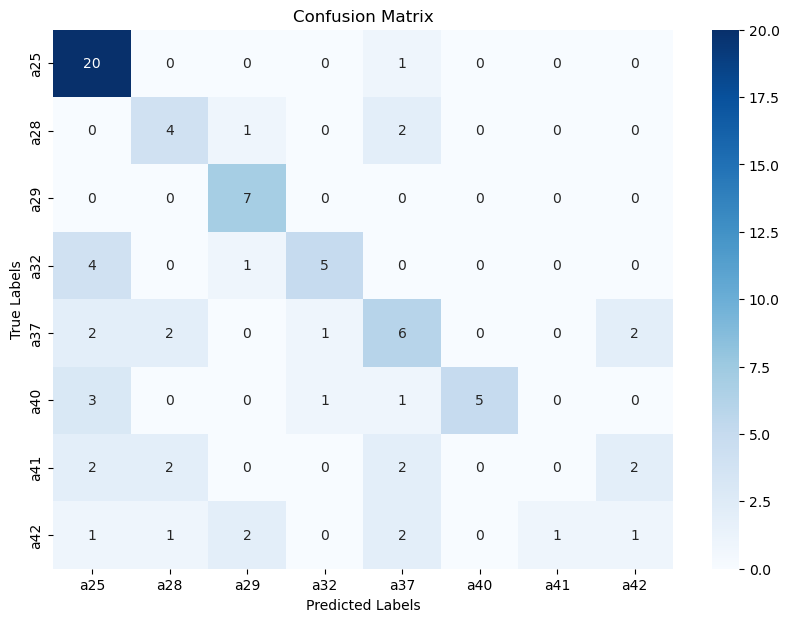

--------------------------------------------------
LDA
--------------------------------------------------
Wynik:  ['a41' 'a32' 'a25' 'a25' 'a40' 'a25' 'a40' 'a32' 'a32' 'a25' 'a29' 'a40'
 'a40' 'a29' 'a42' 'a32' 'a29' 'a37' 'a28' 'a40' 'a37' 'a25' 'a40' 'a42'
 'a42' 'a37' 'a42' 'a28' 'a25' 'a37' 'a41' 'a28' 'a32' 'a37' 'a25' 'a32'
 'a37' 'a25' 'a25' 'a25' 'a42' 'a28' 'a25' 'a41' 'a41' 'a37' 'a29' 'a41'
 'a32' 'a41' 'a25' 'a25' 'a41' 'a40' 'a28' 'a32' 'a25' 'a29' 'a42' 'a29'
 'a29' 'a37' 'a42' 'a42' 'a40' 'a25' 'a32' 'a37' 'a42' 'a25' 'a32' 'a41'
 'a28' 'a42' 'a25' 'a25' 'a41' 'a25' 'a37' 'a25' 'a25' 'a29' 'a42' 'a37']
Etykiety:  ['a41', 'a32', 'a25', 'a25', 'a40', 'a25', 'a40', 'a32', 'a32', 'a25', 'a29', 'a40', 'a40', 'a29', 'a42', 'a37', 'a28', 'a40', 'a37', 'a40', 'a37', 'a25', 'a40', 'a42', 'a28', 'a37', 'a42', 'a28', 'a25', 'a37', 'a25', 'a28', 'a32', 'a37', 'a25', 'a32', 'a37', 'a25', 'a25', 'a25', 'a42', 'a41', 'a25', 'a41', 'a41', 'a37', 'a29', 'a41', 'a32', 'a40', 'a25', 'a37'

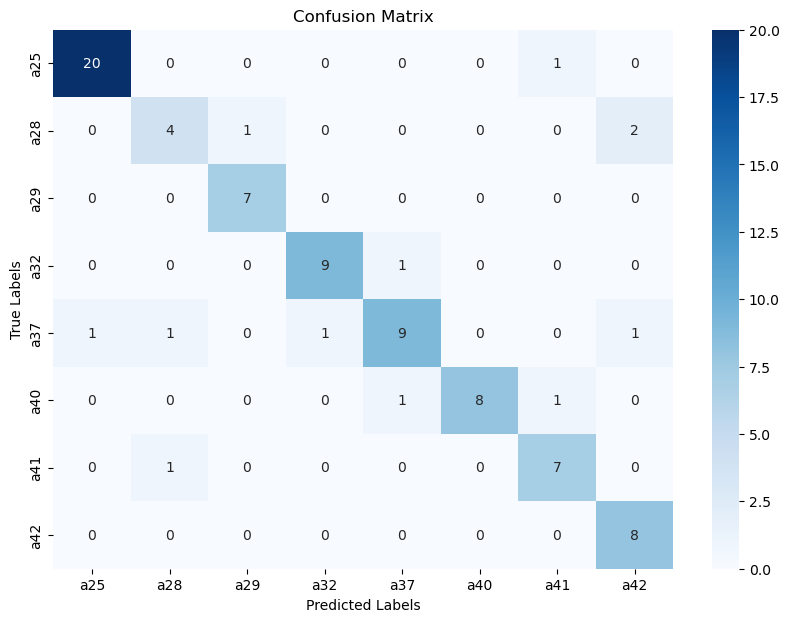

--------------------------------------------------
NB
--------------------------------------------------
Wynik:  ['a41' 'a32' 'a25' 'a25' 'a37' 'a25' 'a40' 'a32' 'a32' 'a32' 'a29' 'a37'
 'a25' 'a29' 'a32' 'a42' 'a29' 'a40' 'a37' 'a37' 'a29' 'a25' 'a25' 'a32'
 'a37' 'a37' 'a42' 'a28' 'a25' 'a25' 'a37' 'a28' 'a25' 'a37' 'a32' 'a25'
 'a32' 'a32' 'a25' 'a25' 'a32' 'a41' 'a28' 'a32' 'a41' 'a37' 'a29' 'a28'
 'a32' 'a37' 'a25' 'a32' 'a41' 'a28' 'a29' 'a25' 'a25' 'a29' 'a37' 'a29'
 'a29' 'a29' 'a41' 'a29' 'a25' 'a25' 'a37' 'a37' 'a25' 'a37' 'a25' 'a41'
 'a28' 'a37' 'a25' 'a25' 'a37' 'a25' 'a41' 'a25' 'a32' 'a29' 'a42' 'a28']
Etykiety:  ['a41', 'a32', 'a25', 'a25', 'a40', 'a25', 'a40', 'a32', 'a32', 'a25', 'a29', 'a40', 'a40', 'a29', 'a42', 'a37', 'a28', 'a40', 'a37', 'a40', 'a37', 'a25', 'a40', 'a42', 'a28', 'a37', 'a42', 'a28', 'a25', 'a37', 'a25', 'a28', 'a32', 'a37', 'a25', 'a32', 'a37', 'a25', 'a25', 'a25', 'a42', 'a41', 'a25', 'a41', 'a41', 'a37', 'a29', 'a41', 'a32', 'a40', 'a25', 'a37',

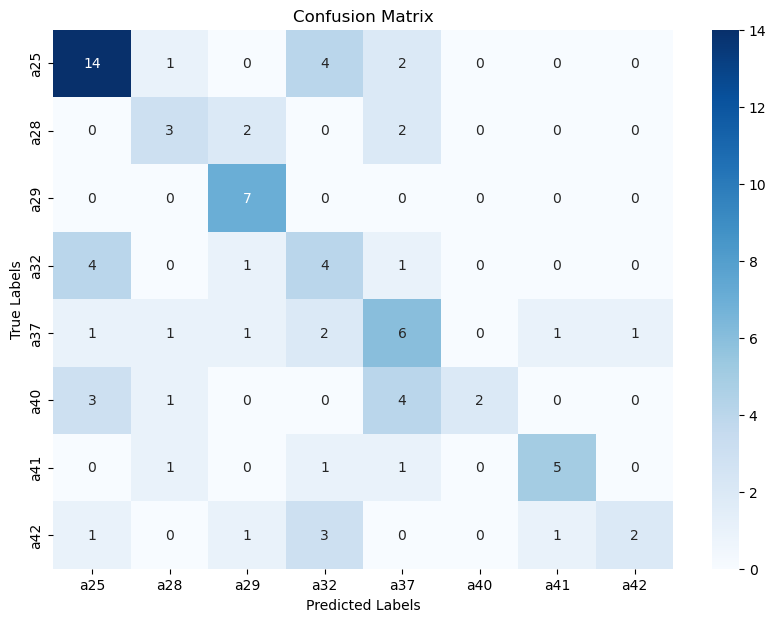

--------------------------------------------------
TREE
--------------------------------------------------
Wynik:  ['a41' 'a32' 'a25' 'a25' 'a40' 'a25' 'a28' 'a32' 'a25' 'a25' 'a32' 'a40'
 'a40' 'a29' 'a41' 'a25' 'a29' 'a40' 'a40' 'a40' 'a32' 'a25' 'a40' 'a42'
 'a42' 'a37' 'a40' 'a32' 'a25' 'a37' 'a37' 'a28' 'a32' 'a28' 'a25' 'a25'
 'a25' 'a25' 'a25' 'a25' 'a41' 'a40' 'a25' 'a41' 'a41' 'a32' 'a29' 'a37'
 'a32' 'a28' 'a32' 'a37' 'a37' 'a40' 'a37' 'a25' 'a25' 'a41' 'a42' 'a29'
 'a37' 'a41' 'a42' 'a42' 'a40' 'a25' 'a29' 'a37' 'a37' 'a25' 'a32' 'a41'
 'a25' 'a40' 'a25' 'a25' 'a41' 'a25' 'a40' 'a25' 'a42' 'a29' 'a37' 'a37']
Etykiety:  ['a41', 'a32', 'a25', 'a25', 'a40', 'a25', 'a40', 'a32', 'a32', 'a25', 'a29', 'a40', 'a40', 'a29', 'a42', 'a37', 'a28', 'a40', 'a37', 'a40', 'a37', 'a25', 'a40', 'a42', 'a28', 'a37', 'a42', 'a28', 'a25', 'a37', 'a25', 'a28', 'a32', 'a37', 'a25', 'a32', 'a37', 'a25', 'a25', 'a25', 'a42', 'a41', 'a25', 'a41', 'a41', 'a37', 'a29', 'a41', 'a32', 'a40', 'a25', 'a37

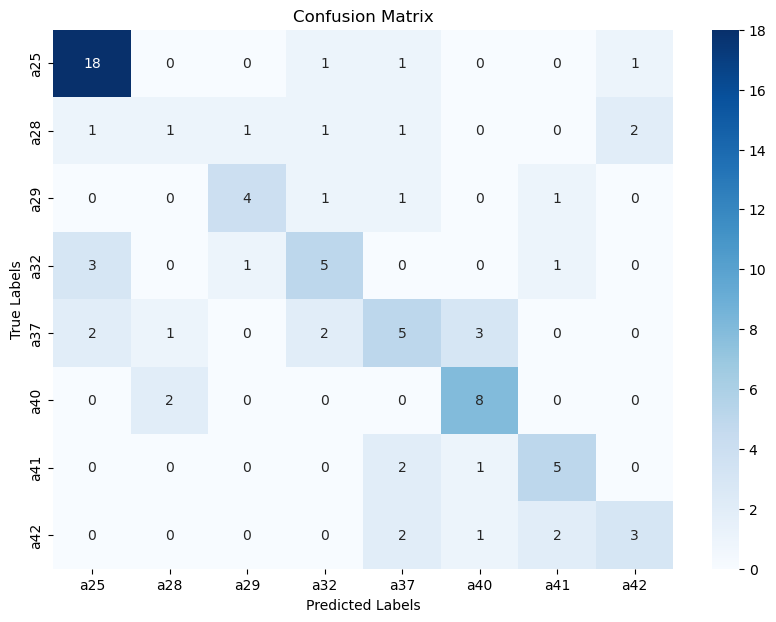

--------------------------------------------------
RF
--------------------------------------------------
Wynik:  ['a42' 'a32' 'a25' 'a25' 'a40' 'a25' 'a40' 'a32' 'a25' 'a25' 'a29' 'a40'
 'a40' 'a28' 'a41' 'a42' 'a29' 'a40' 'a28' 'a40' 'a37' 'a25' 'a40' 'a42'
 'a37' 'a37' 'a42' 'a37' 'a25' 'a37' 'a25' 'a28' 'a25' 'a37' 'a25' 'a25'
 'a40' 'a25' 'a25' 'a25' 'a42' 'a37' 'a25' 'a41' 'a41' 'a37' 'a29' 'a41'
 'a32' 'a40' 'a25' 'a37' 'a41' 'a40' 'a28' 'a25' 'a25' 'a29' 'a37' 'a29'
 'a29' 'a37' 'a42' 'a29' 'a40' 'a25' 'a32' 'a37' 'a40' 'a25' 'a25' 'a41'
 'a37' 'a37' 'a25' 'a25' 'a41' 'a25' 'a25' 'a25' 'a32' 'a29' 'a42' 'a28']
Etykiety:  ['a41', 'a32', 'a25', 'a25', 'a40', 'a25', 'a40', 'a32', 'a32', 'a25', 'a29', 'a40', 'a40', 'a29', 'a42', 'a37', 'a28', 'a40', 'a37', 'a40', 'a37', 'a25', 'a40', 'a42', 'a28', 'a37', 'a42', 'a28', 'a25', 'a37', 'a25', 'a28', 'a32', 'a37', 'a25', 'a32', 'a37', 'a25', 'a25', 'a25', 'a42', 'a41', 'a25', 'a41', 'a41', 'a37', 'a29', 'a41', 'a32', 'a40', 'a25', 'a37',

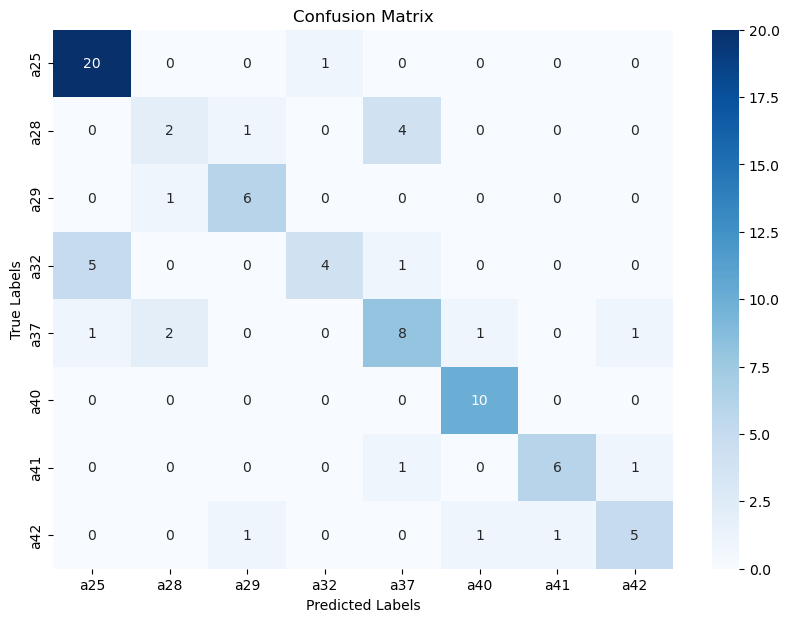

--------------------------------------------------
SVM
--------------------------------------------------
Wynik:  ['a37' 'a32' 'a25' 'a25' 'a40' 'a25' 'a40' 'a32' 'a25' 'a25' 'a37' 'a40'
 'a25' 'a37' 'a25' 'a32' 'a37' 'a40' 'a37' 'a25' 'a37' 'a25' 'a25' 'a25'
 'a37' 'a37' 'a37' 'a37' 'a25' 'a37' 'a25' 'a37' 'a25' 'a37' 'a25' 'a25'
 'a37' 'a25' 'a25' 'a25' 'a37' 'a32' 'a25' 'a32' 'a32' 'a37' 'a37' 'a37'
 'a25' 'a40' 'a25' 'a37' 'a32' 'a25' 'a37' 'a25' 'a25' 'a37' 'a37' 'a37'
 'a37' 'a37' 'a32' 'a37' 'a25' 'a25' 'a37' 'a37' 'a37' 'a25' 'a25' 'a37'
 'a37' 'a37' 'a25' 'a25' 'a37' 'a25' 'a25' 'a25' 'a32' 'a37' 'a32' 'a37']
Etykiety:  ['a41', 'a32', 'a25', 'a25', 'a40', 'a25', 'a40', 'a32', 'a32', 'a25', 'a29', 'a40', 'a40', 'a29', 'a42', 'a37', 'a28', 'a40', 'a37', 'a40', 'a37', 'a25', 'a40', 'a42', 'a28', 'a37', 'a42', 'a28', 'a25', 'a37', 'a25', 'a28', 'a32', 'a37', 'a25', 'a32', 'a37', 'a25', 'a25', 'a25', 'a42', 'a41', 'a25', 'a41', 'a41', 'a37', 'a29', 'a41', 'a32', 'a40', 'a25', 'a37'

/opt/anaconda3/envs/deep/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/deep/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/deep/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


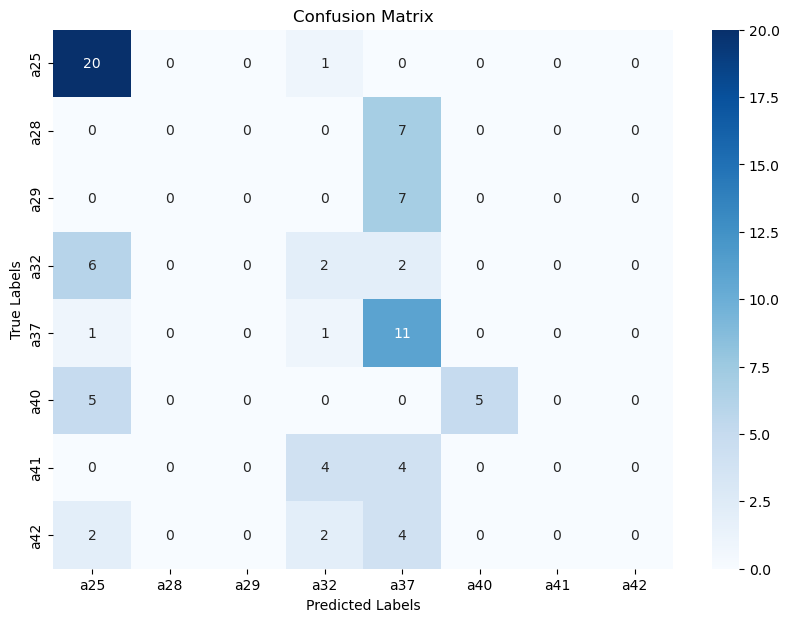

--------------------------------------------------
PERC
--------------------------------------------------
Wynik:  ['a41' 'a42' 'a25' 'a25' 'a40' 'a25' 'a40' 'a32' 'a32' 'a25' 'a29' 'a40'
 'a40' 'a37' 'a42' 'a42' 'a42' 'a40' 'a41' 'a40' 'a37' 'a25' 'a40' 'a42'
 'a42' 'a37' 'a42' 'a28' 'a25' 'a37' 'a25' 'a28' 'a25' 'a37' 'a25' 'a25'
 'a37' 'a25' 'a25' 'a25' 'a42' 'a41' 'a25' 'a37' 'a41' 'a37' 'a29' 'a41'
 'a37' 'a40' 'a25' 'a37' 'a41' 'a40' 'a42' 'a25' 'a25' 'a42' 'a37' 'a25'
 'a28' 'a25' 'a42' 'a42' 'a40' 'a25' 'a32' 'a37' 'a42' 'a25' 'a25' 'a41'
 'a28' 'a37' 'a25' 'a25' 'a41' 'a25' 'a37' 'a25' 'a42' 'a37' 'a42' 'a37']
Etykiety:  ['a41', 'a32', 'a25', 'a25', 'a40', 'a25', 'a40', 'a32', 'a32', 'a25', 'a29', 'a40', 'a40', 'a29', 'a42', 'a37', 'a28', 'a40', 'a37', 'a40', 'a37', 'a25', 'a40', 'a42', 'a28', 'a37', 'a42', 'a28', 'a25', 'a37', 'a25', 'a28', 'a32', 'a37', 'a25', 'a32', 'a37', 'a25', 'a25', 'a25', 'a42', 'a41', 'a25', 'a41', 'a41', 'a37', 'a29', 'a41', 'a32', 'a40', 'a25', 'a37

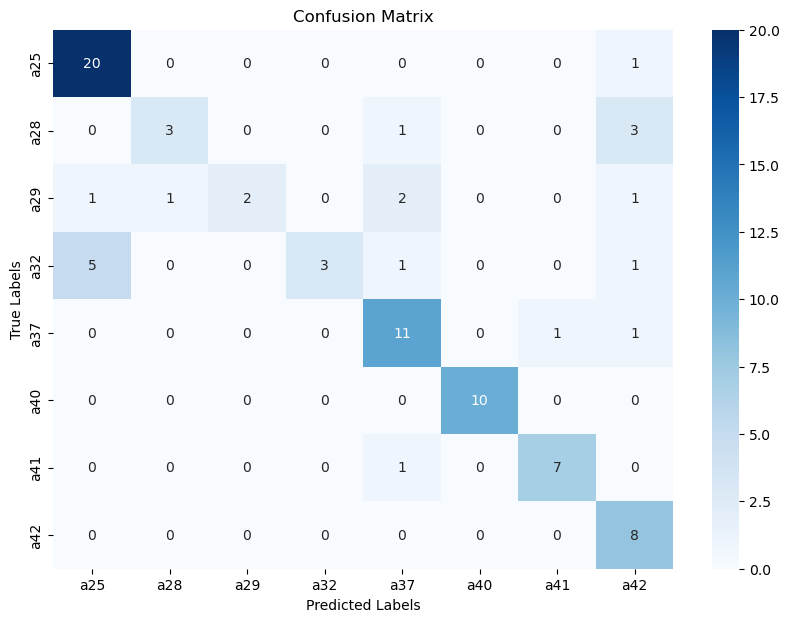

--------------------------------------------------
{'KNN': 0.5714285714285714, 'LDA': 0.8571428571428571, 'NB': 0.5119047619047619, 'TREE': 0.5833333333333334, 'RF': 0.7261904761904762, 'SVM': 0.4523809523809524, 'PERC': 0.7619047619047619}


<BarContainer object of 7 artists>

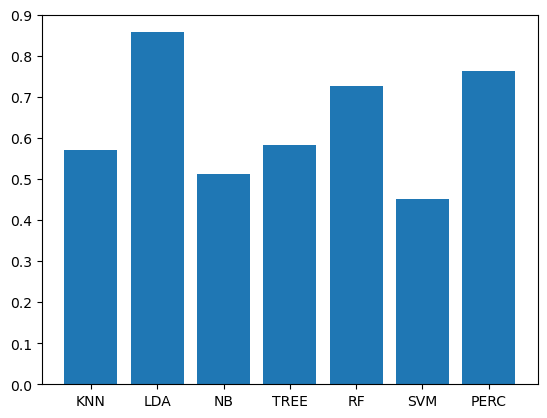

In [64]:
all_models = ["KNN","LDA","NB","TREE","RF","SVM","PERC"]
map_acc = {}
for model_name in all_models:
    model = classification(model_name,train_set.iloc[:,1:],train_set.iloc[:,0])
    print(model_name)
    print("--------------------------------------------------")
    acc = evaluate(model, test_samples, test_labels)
    print("--------------------------------------------------")
    map_acc[model_name] = acc

print(map_acc)
# plot the accuracy of each model
plt.bar(map_acc.keys(), map_acc.values())

# Wybór najlepszych modeli

In [92]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score


def cv_search(train_set):
    best_models = {k: v for k, v in sorted(map_acc.items(), key=lambda item: item[1], reverse=True)}

    # best 3 models
    best_models = list(best_models.keys())[:3]
    print(f"Best models: {best_models}")
    cv_results = {}

    # Define parameter grids for the best models: {best_models}")

    # Perform cross-validation for the best 3 models
    cv_results = {}
    for model_name in best_models:
        model = classification(model_name, train_set.iloc[:, 1:], train_set.iloc[:, 0])  # Adjust according to your method
        print(f"Cross-validating model: {model_name}")
        
        # Perform 5-fold cross-validation and store the results
        scores = cross_val_score(model, train_set.iloc[:, 1:], train_set.iloc[:, 0], cv=8, scoring='accuracy')
        cv_results[model_name] = scores
        print(f"{model_name} Cross-Validation Accuracy: {scores.mean()}")

    # Visualize cross-validation results
    plt.figure(figsize=(10, 5))
    plt.bar(cv_results.keys(), [np.mean(scores) for scores in cv_results.values()])
    plt.ylabel("Cross-Validation Accuracy")
    plt.title("Cross-Validation Results for Best Models")
    plt.show()

    print(cv_results)

In [ ]:
cv_search(train_set)

Best models: ['LDA', 'PERC', 'RF']


KeyboardInterrupt: 

In [74]:
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA


In [86]:

# Step 1: Variance Threshold to remove low variance features
def variance_threshold_selector(data, threshold=0.01):
    selector = VarianceThreshold(threshold=threshold)
    reduced_data = selector.fit_transform(data)
    print(f"Original feature count: {data.shape[1]}")
    print(f"Reduced feature count after Variance Threshold: {reduced_data.shape[1]}")
    return reduced_data
    
from sklearn.feature_selection import SelectKBest, f_classif

# Step 2: Univariate feature selection (ANOVA F-test)
def univariate_feature_selection(data, labels, k=100):
    selector = SelectKBest(f_classif, k=k)
    reduced_data = selector.fit_transform(data, labels)
    print(f"Reduced feature count after ANOVA F-test: {reduced_data.shape[1]}")
    return reduced_data
# Step 2: Recursive Feature Elimination (RFE) with Random Forest or LDA
def recursive_feature_elimination(data, labels, model, n_features_to_select=50):
    # Initialize the model for RFE (RandomForest as an example)
    rfe = RFE(model, n_features_to_select=n_features_to_select)
    rfe = rfe.fit(data, labels)
    
    # Get the selected features
    selected_features = rfe.transform(data)
    
    # Print the ranking of features (lower number is better)
    print("Feature Ranking: ", rfe.ranking_)
    
    return selected_features, rfe

# Step 3: Apply PCA (Optional) for further dimensionality reduction
def apply_pca(data, n_components=50):
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(data)
    print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
    return pca_data





# Feature selection

- variance threshold - removes features with low variance
- univariate feature selection removes features that are statistically less relevant for classification.

In [88]:
# Variance Threshold to remove low-variance features
reduced_data = variance_threshold_selector(train_set.iloc[:, 1:], threshold=0.01)
reduced_data = univariate_feature_selection(reduced_data, train_set.iloc[:, 0], k=500)


Original feature count: 12288
Reduced feature count after Variance Threshold: 8750
Reduced feature count after ANOVA F-test: 500


In [89]:
# Recursive Feature Elimination with Random Forest (or another model)
rf_model = RandomForestClassifier(n_estimators=100)  # You can replace this with LDA or another model
selected_data, rfe_model = recursive_feature_elimination(reduced_data, train_set.iloc[:, 0], rf_model, n_features_to_select=100)


Feature Ranking:  [194   1 292 253 122 200 237 346 248 298 273 377   9 320 124 176 366 336
 150 395 380 317 240 211 338 399 350 300 207 357 111  46   1   1 167 267
 396 243 187  63 277 297 137 121 384 173 146 400 263 112 154 355 344 268
 310 331  38 105 321   1 270   1 379 387 229  17 337 128  87 280 361 283
  68  69 318 327 250 104 282  92 247 368 342  59 334 343  27 130 160 116
   1 125 264   1  97   1   1   1   1   1   1   1   1   1  41 135  62  10
 208  33 236 126 288 388  89 132 117 279   6 123   1 174 246  67 152  95
   1 175   1   1 205   1 196   1   1   1   1 127 142 109   1 221  93  29
  84  60   1 140   1   1   1   1   1   5  19  52  31   1  32   1  24   1
   1  88   1   1   1   1  58   1   1  21  12   1   1   1  23   1  51   1
   1   1 143  61  74  54  91   1  11   1  76  57 217 213 244 299 391 386
 364 169 189 301 363  49 223 303 381   1  56  98 294  25 272 382 345 341
 203 329 134 218 225 307 362 340 249 219 231  85   1   1 235 234   1 232
 180   1   1 296 153 328 190  16 

In [106]:
# convert selected data to dataframe    
selected_data = pd.DataFrame(selected_data)
selected_data[0] = train_set.iloc[:, 0]
selected_data.head()
# drop na
selected_data = selected_data.dropna()
len(selected_data)

265

In [90]:

# Optionally, apply PCA after RFE for further reduction
pca_data = apply_pca(selected_data, n_components=50)

Explained variance ratio: [6.14921646e-01 1.55286808e-01 5.59947965e-02 4.11960526e-02
 3.27785082e-02 2.59779479e-02 1.75729302e-02 1.58033188e-02
 1.07792791e-02 6.23482236e-03 5.31361485e-03 3.89633291e-03
 2.96561472e-03 1.95027290e-03 1.72572845e-03 1.13939923e-03
 1.00850086e-03 7.37002048e-04 5.65094993e-04 5.17695681e-04
 4.30827167e-04 3.83832850e-04 3.53737308e-04 2.84438278e-04
 2.46181062e-04 2.38627194e-04 1.99847899e-04 1.75345074e-04
 1.68914259e-04 1.38833275e-04 1.23282570e-04 1.00354657e-04
 8.51529576e-05 7.37507611e-05 6.75327222e-05 5.94108327e-05
 5.82126304e-05 5.04191457e-05 4.46704470e-05 3.46632642e-05
 3.21032215e-05 2.96766832e-05 2.82584350e-05 2.18473794e-05
 1.74453518e-05 1.63755378e-05 1.48107187e-05 1.40955199e-05
 1.15821501e-05 1.01561738e-05]


Best models: ['LDA', 'PERC', 'RF']
Cross-validating model: LDA
LDA Cross-Validation Accuracy: 0.19630124777183602
Cross-validating model: PERC
PERC Cross-Validation Accuracy: 0.22237076648841356
Cross-validating model: RF
RF Cross-Validation Accuracy: 0.24888591800356508


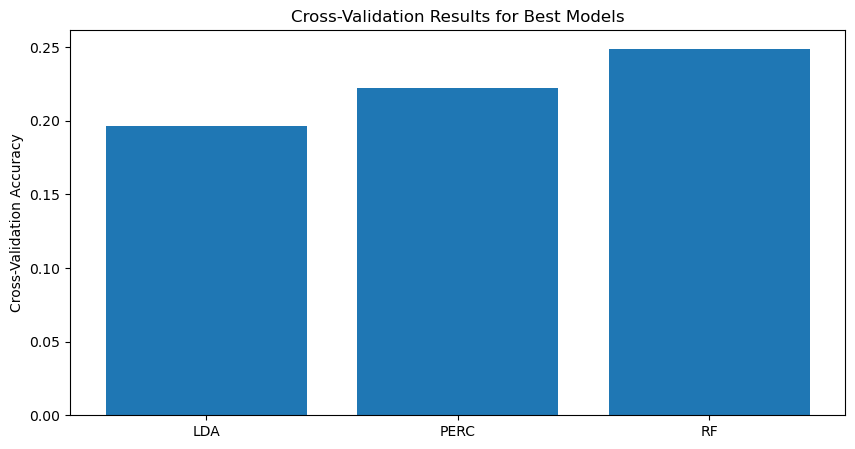

{'LDA': array([0.17647059, 0.21212121, 0.18181818, 0.3030303 , 0.15151515,
       0.18181818, 0.21212121, 0.15151515]), 'PERC': array([0.29411765, 0.3030303 , 0.27272727, 0.15151515, 0.12121212,
       0.09090909, 0.24242424, 0.3030303 ]), 'RF': array([0.29411765, 0.3030303 , 0.18181818, 0.21212121, 0.24242424,
       0.3030303 , 0.27272727, 0.18181818])}


In [107]:
cv_search(selected_data)

# Illustrate eye movements 

In [4]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
import re

def parse_coordinates(data_string):
    # Extract coordinates using regex
    coords = re.findall(r'-?\d+', data_string)
    # Convert to integers and reshape into pairs
    coords = np.array([int(x) for x in coords])
    x_coords = coords[::2]
    y_coords = coords[1::2]
    return x_coords, y_coords

def create_eye_movement_visualization(data_row, output_file=None):
    # Parse the data
    parts = data_row.split('...')
    user_id = parts[0].strip().split()[0]
    coords_str = parts[1]
    
    # Get x and y coordinates
    x_coords, y_coords = parse_coordinates(coords_str)
    
    # Create time points (250Hz = 4ms between points)
    times = np.arange(len(x_coords)) * 4  # milliseconds
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create points for the 3x3 stimulus grid
    grid_points = {
        'center': (0, 0),
        'top_right': (50, 50),
        'top_middle': (0, 50),
        'top_left': (-50, 50),
        'middle_right': (50, 0),
        'middle_left': (-50, 0),
        'bottom_right': (50, -50),
        'bottom_middle': (0, -50),
        'bottom_left': (-50, -50)
    }
    
    # Plot stimulus grid points
    for position, (x, y) in grid_points.items():
        ax.plot(x, y, 'k+', markersize=10)
    
    # Create segments for line collection
    points = np.array([x_coords, y_coords]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # Create custom colormap for time progression
    colors = plt.cm.viridis(np.linspace(0, 1, len(segments)))
    
    # Create line collection
    lc = LineCollection(segments, colors=colors, linewidth=2)
    ax.add_collection(lc)
    
    # Add colorbar
    norm = plt.Normalize(times.min(), times.max())
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Time (ms)')
    
    # Set plot properties
    ax.set_xlim(min(x_coords) - 10, max(x_coords) + 10)
    ax.set_ylim(min(y_coords) - 10, max(y_coords) + 10)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_title(f'Eye Movement Trajectory - Subject {user_id}')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    
    # Add start and end markers
    ax.plot(x_coords[0], y_coords[0], 'go', label='Start', markersize=10)
    ax.plot(x_coords[-1], y_coords[-1], 'ro', label='End', markersize=10)
    
    # Add legend
    ax.legend()
    
    # Save or show the plot
    if output_file:
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
